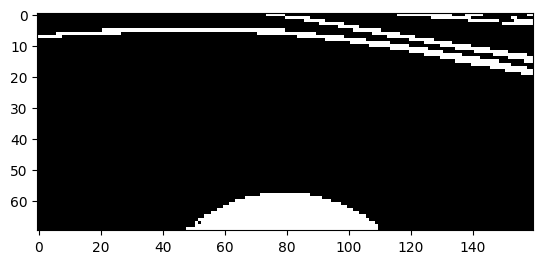

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
from sklearn.neural_network import MLPRegressor
import os
import numpy as np
from sklearn.model_selection import train_test_split
import natsort
import json
import matplotlib.pyplot as plt
import cv2
from natsort import natsorted
import glob
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import SGD

X=[]
IMAGE_DIR = "datasets\\dataset_drive14\\images"
LABEL_DIR = "datasets\\dataset_drive14"
# Load the image features
temp = [cv2.cvtColor(cv2.imread(file),cv2.COLOR_BGR2RGB) for file in natsorted(glob.glob(IMAGE_DIR+"\\*.jpg"))]
TRESH3_MIN = np.array([0, 0, 0],np.uint8)
TRESH3_MAX = np.array([255, 120, 255],np.uint8)
for img in temp[:1400]:
    X.append(255-cv2.inRange(img, TRESH3_MIN, TRESH3_MAX,)[50:][:])
for img in temp[1800:]:
    X.append(255-cv2.inRange(img, TRESH3_MIN, TRESH3_MAX,)[50:][:])
plt.imshow(X[1000],cmap='gray')
plt.show()
X=np.array(X)/255
print(X[0])


In [2]:

listecte = []
with open(LABEL_DIR + "\\labels.json") as labels_file:
    labels = json.load(labels_file)
for img in list(labels.keys())[:1400]:
    listecte.append(np.round(labels[img]['pos/cte'],2))
for img in list(labels.keys())[1800:]:
    listecte.append(np.round(labels[img]['pos/cte'],2))
y=np.array(listecte)/max(listecte)
regressor = Sequential()

# Add convolutional layers
regressor.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(70, 160, 1)))
regressor.add(MaxPooling2D(pool_size=(2, 2)))
regressor.add(Convolution2D(64, (3, 3), activation='relu'))
regressor.add(MaxPooling2D(pool_size=(2, 2)))
regressor.add(Convolution2D(128, (3, 3), activation='relu'))
regressor.add(MaxPooling2D(pool_size=(2, 2)))
regressor.add(Flatten())

# Add fully connected layers
regressor.add(Dense(256, activation='relu'))
regressor.add(Dropout(0.5))
regressor.add(Dense(128, activation='relu'))
regressor.add(Dropout(0.5))
regressor.add(Dense(64, activation='relu'))
regressor.add(Dropout(0.5))
regressor.add(Dense(1))
regressor.compile(optimizer='adam',loss='mse', metrics=['mae', 'accuracy'])

regressor.summary()



# Fit the grid search to the training data
history=regressor.fit(X, y, epochs=100, batch_size=128, verbose='auto', validation_split=0.25,workers=-1,use_multiprocessing=True,shuffle=True)
# Get the best estimator
# best_regressor = grid_search.best_estimator_

# Fit the best regressor to the training data
# best_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred = regressor.predict(X)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 158, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 34, 79, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 38, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 36, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 7, 18, 128)        0

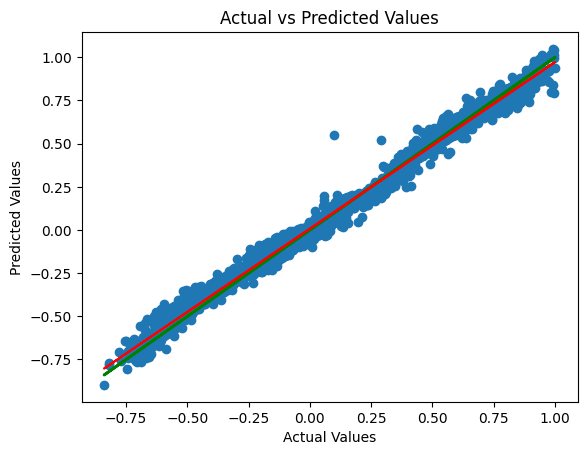

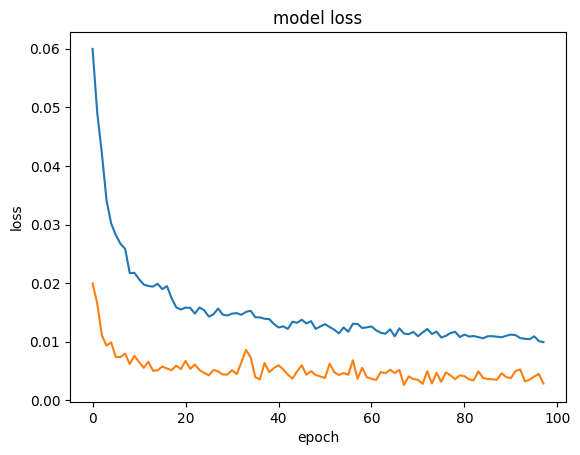

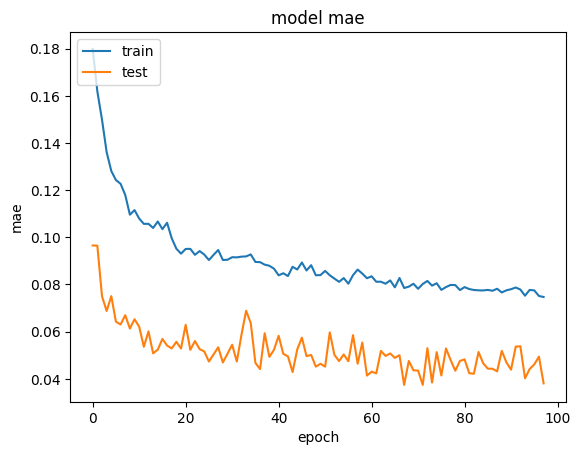

In [4]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values
plt.scatter(y, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot(y,y, color='green', linewidth=2)
regression_line = np.polyfit(y, y_pred, 1)
plt.plot(y, np.polyval(regression_line, y), color='red')
plt.show()

plt.plot(history.history['loss'][2:])
plt.plot(history.history['val_loss'][2:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# plt.plot(history.history['mse'][1:])
# plt.plot(history.history['val_mse'][1:])
# plt.title('model mse')
# plt.ylabel('mse')
# plt.xlabel('epoch')
# plt.show()

plt.plot(history.history['mae'][2:])
plt.plot(history.history['val_mae'][2:])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()





In [ ]:
IMAGE_DIR = "dataset_drive12\\images"
# Load the image features
temp = [cv2.cvtColor(cv2.imread(file),cv2.COLOR_BGR2RGB) for file in natsorted(glob.glob(IMAGE_DIR+"\\*.jpg"))[1:1000]]


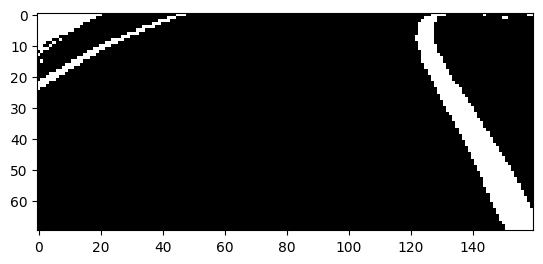

In [ ]:
TRESH3_MIN = np.array([0, 0, 0],np.uint8)
TRESH3_MAX = np.array([255, 230, 255],np.uint8)
Xtest=[]
for img in temp:
    Xtest.append(255-cv2.inRange(img, TRESH3_MIN, TRESH3_MAX,)[50:][:])
Xtest=np.array(Xtest)/255
plt.imshow(Xtest[500],cmap='gray')
plt.show()
# Xtest=Xtest.reshape(X.shape[0],-1)


16/16 [==============================] - 2s 136ms/step


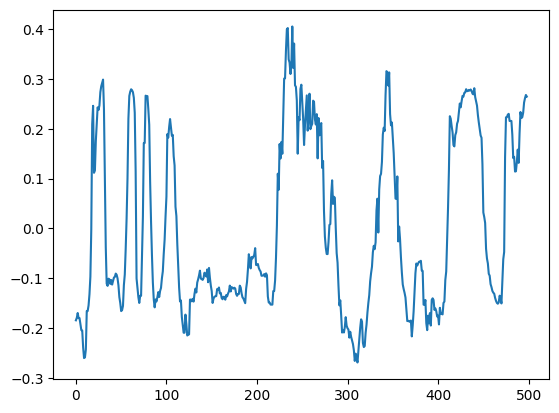

In [ ]:
predicted = regressor.predict(Xtest[1:500],verbose=1,workers=8,use_multiprocessing=True)
plt.plot(predicted)

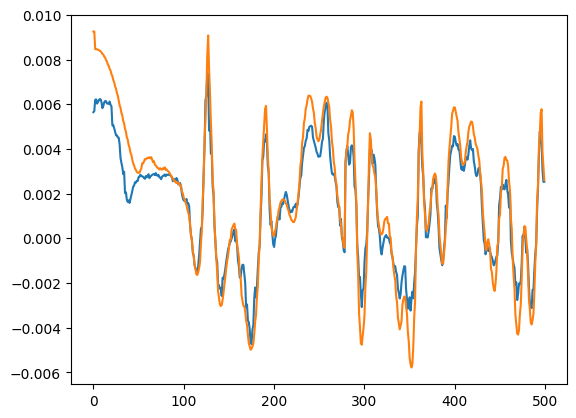

In [ ]:
plt.plot(y_pred[:500]*0.25/27)
plt.plot(y[:500]*0.25/27)
plt.show()


16/16 [==============================] - 1s 75ms/step


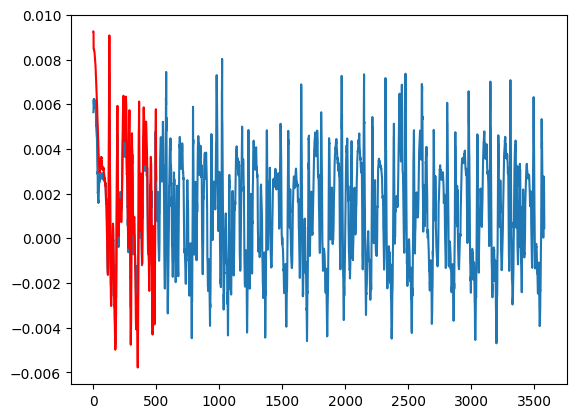

In [ ]:
from keras.models import load_model

model_path = "model.h5"
loaded_model = load_model(model_path)
y_pred_load=loaded_model.predict(X[:500],verbose=1,workers=8,use_multiprocessing=True)
plt.plot(y_pred*0.25/27)
plt.plot(y[:500]*0.25/27,color='red')
plt.show()

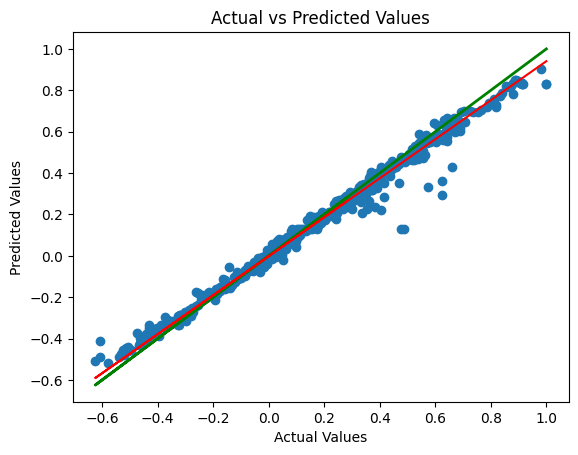

16/16 [==============================] - 1s 70ms/step - loss: 0.0027 - mae: 0.0328 - accuracy: 0.0040
Loss: 0.0027454341761767864
Mean Absolute Error: 0.03277309983968735
Accuracy: 0.004000000189989805
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 158, 16)       160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 34, 79, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 77, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 38, 32)        0         
 g2D)                                                            
                                                    

In [ ]:
plt.scatter(y[:500], y_pred_load)
plt.plot(y[:500],y[:500], color='green', linewidth=2)
plt.plot(y[:500], np.polyval(regression_line, y[:500]), color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

performance = loaded_model.evaluate(X[:500], y[:500], verbose=1)
print("Loss:", performance[0])
print("Mean Absolute Error:", performance[1])
print("Accuracy:", performance[2])

loaded_model.summary()
loaded_model.history
